In [17]:
import dask.dataframe as dd
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
from transformers import pipeline
import re
import dask
import emoji
import matplotlib.pyplot as plt

In [ ]:
# !gdown 1HbGToGFvKc3mYaNEOptAkrW0xyNZSuCE

Downloading...
From (original): https://drive.google.com/uc?id=1HbGToGFvKc3mYaNEOptAkrW0xyNZSuCE
From (redirected): https://drive.google.com/uc?id=1HbGToGFvKc3mYaNEOptAkrW0xyNZSuCE&confirm=t&uuid=233421e7-9f02-4205-8dd8-3478d6415864
To: /content/filtered_tweets.csv
100% 1.05G/1.05G [00:14<00:00, 73.3MB/s]


# Data Prerosessing

In [2]:
df = dd.read_csv(
    "filtered_tweets.csv",
    dtype=str,            # Cast all columns to string to avoid parsing issues
    on_bad_lines='skip',  # Skip lines with errors
    assume_missing=True    # Helps if columns have mixed types
)
# Access the first partition directly
# df.head()

In [3]:
df_filtered_french = df[df['language'] == "fr"]
df_filtered_french.head()

,tweetId,createdAtDateTweet,createdAtTimeTweet,language,likes,place,withheldCountries,retweetCount,isRetweet,isReply,isQuote,userLabels,userFollowers,userVerified,userLocation,tweetText
4,1390000929127104513,2021-05-05,19:50:21,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Effectivement. Mais tu vas t’...
6,1353626202368577543,2021-01-25,09:50:10,fr,0,NONE,NONE,NONE,true,false,false,[BLOGGER],4547,false,Mali,RT @PNUDMALI: Le @PNUDMALI avec @YagtuOng a te...
7,1435135632788045831,2021-09-07,08:59:33,fr,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@CuiBeau Chaque jour 2 fois
8,1398029653357510660,2021-05-27,23:33:38,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@OwnIsHope C’est quoi le projet?
9,1390001023276703748,2021-05-05,19:50:43,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Sois la bienvenue parmi nous


/usr/local/lib/python3.11/dist-packages/dask/_task_spec.py:745: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/usr/local/lib/python3.11/dist-packages/dask/_task_spec.py:745: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/usr/local/lib/python3.11/dist-packages/dask/_task_spec.py:745: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/usr/local/lib/python3.11/dist-packages/dask/_task_spec.py:745: FutureWarning: Operation between non boolean Ser

1051179


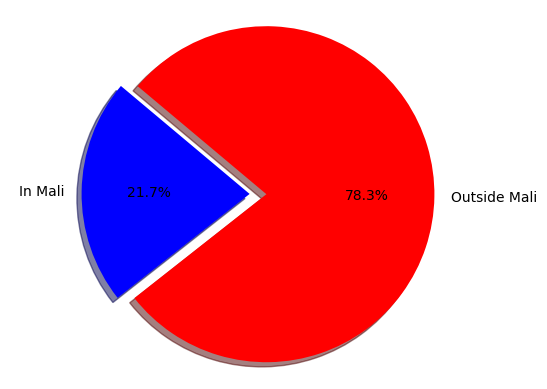

In [ ]:
number_of_authors_in_Mali = df_filtered_french[df_filtered_french["userLocation"].str.contains('Mali')].shape[0].compute()
print(number_of_authors_in_Mali)

#Plotting number of people in Mali vs number of people outside (Pie chart)
labels = 'In Mali', 'Outside Mali'
sizes = [number_of_authors_in_Mali, df.shape[0].compute()-number_of_authors_in_Mali]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


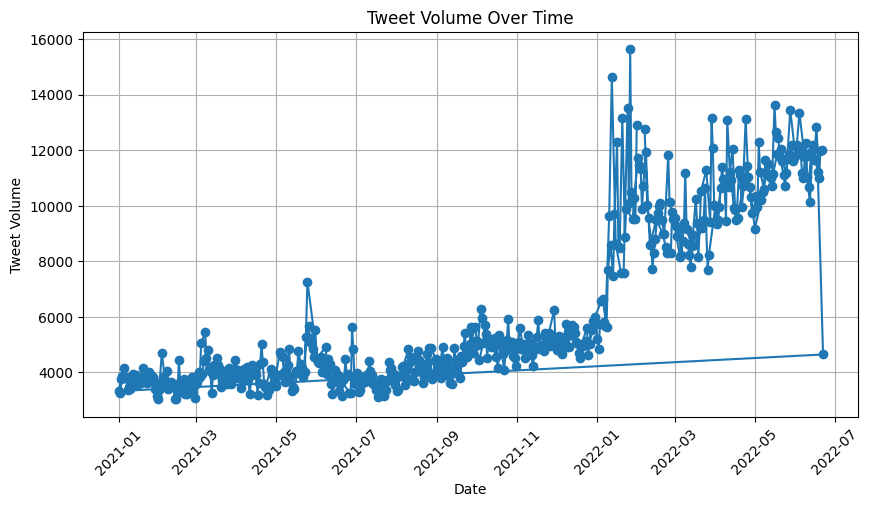

In [ ]:
df_filtered_french['createdAtDateTweet'] = dd.to_datetime(df_filtered_french['createdAtDateTweet'], errors='coerce')
df_filtered_french['createdAtTimeTweet'] = dd.to_datetime(df_filtered_french['createdAtTimeTweet'], errors='coerce')
tweet_volume = df_filtered_french.groupby(df_filtered_french['createdAtDateTweet'].dt.date).size().compute()
plt.figure(figsize=(10, 5))
plt.plot(tweet_volume.index, tweet_volume.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Tweet Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# total_tweets = df_filtered_french['tweetId'].nunique().compute()
# print(f"Total number of tweets: {total_tweets}")

/usr/local/lib/python3.11/dist-packages/dask_expr/_expr.py:1471: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask_expr/_expr.py:1471: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask_expr/_expr.py:1471: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask_expr/_expr.py:14

hour
2     104654
3      66020
7      49783
12    167164
13    177361
20    183226
21    203688
22    224272
0     194737
1     151859
4      41745
5      32566
6      35764
8      70315
9      95424
10    124373
11    148323
14    173947
15    170477
16    166724
17    167177
18    172919
19    176355
23    229768
dtype: int64
day
2021-01-02     3259
2021-01-05     4152
2021-01-06     3798
2021-01-07     3840
2021-01-08     3378
              ...  
2022-06-15    11634
2022-06-17    12818
2022-06-19    10988
2022-06-20    11985
2022-06-21    12000
Length: 538, dtype: int64


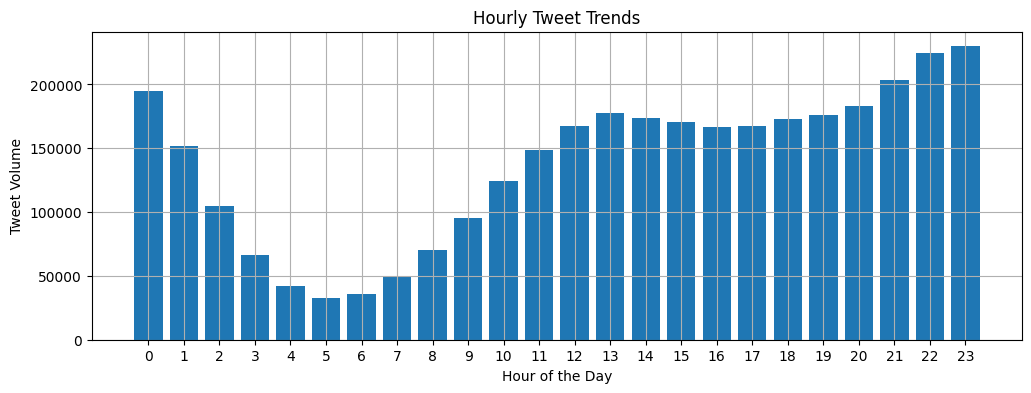

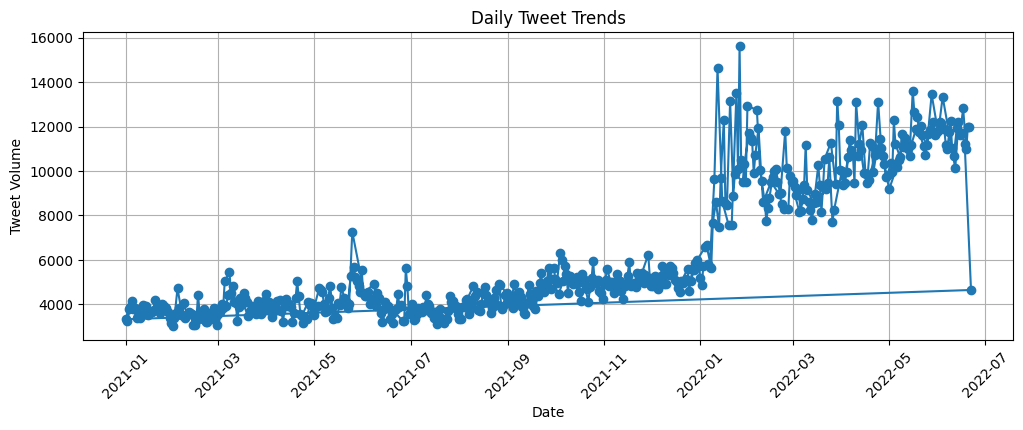

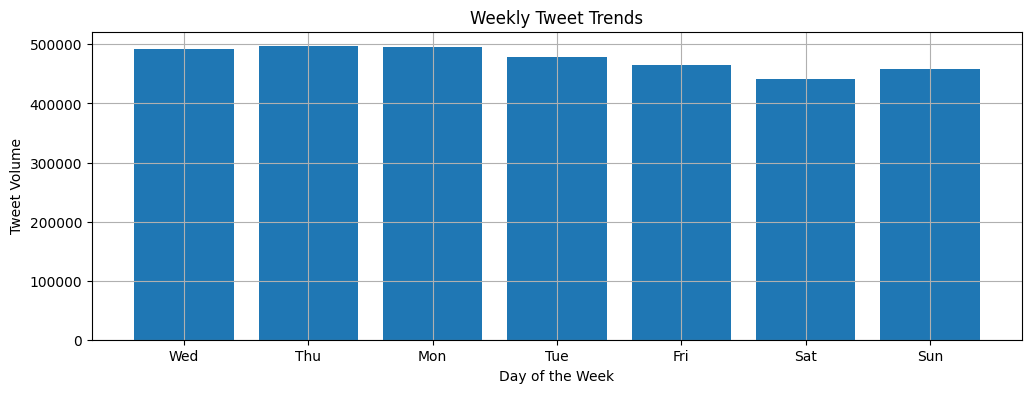

In [ ]:
# Extract temporal components (assuming you use Dask properly for further processing)
df_filtered_french['hour'] = df_filtered_french['createdAtTimeTweet'].dt.hour
df_filtered_french['day'] = df_filtered_french['createdAtDateTweet'].dt.date
df_filtered_french['weekday'] = df_filtered_french['createdAtDateTweet'].dt.weekday  # 0 = Monday, 6 = Sunday

# Compute tweet volume per hour
hourly_trend = df_filtered_french.groupby('hour').size().compute()
print(hourly_trend)

# Compute tweet volume per day
daily_trend = df_filtered_french.groupby('day').size().compute()
print(daily_trend)

# Compute tweet volume per weekday
weekly_trend = df_filtered_french.groupby('weekday').size().compute()

# Plot hourly trends (Bar chart)
plt.figure(figsize=(12, 4))
plt.bar(hourly_trend.index, hourly_trend.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Volume')
plt.title('Hourly Tweet Trends')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure the x-axis shows 0 to 23 hours
plt.show()

# Plot daily trends (Line chart)
plt.figure(figsize=(12, 4))
plt.plot(daily_trend.index, daily_trend.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Daily Tweet Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot weekly trends (Bar chart)
plt.figure(figsize=(12, 4))
plt.bar(weekly_trend.index, weekly_trend.values, tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],)
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Volume')
plt.title('Weekly Tweet Trends')
plt.grid(True)
plt.show()


In [ ]:
# df_filtered_french['likes'] = df['likes'].map_partitions(pd.to_numeric, errors='coerce').fillna(0)
df_filtered_french['retweetCount'] = df_filtered_french['retweetCount'].map_partitions(pd.to_numeric, errors='coerce').fillna(0)

# Find the top 10 most retweeted tweets
top_retweeted = df_filtered_french.nlargest(10, 'retweetCount')[['tweetText', 'retweetCount']].compute()

# Display results
print("Top 10 Most Retweeted Tweets:")
pd.set_option('display.max_colwidth', None)
display(top_retweeted)


Top 10 Most Retweeted Tweets:


,tweetText,retweetCount
9751,Y’a un tipeu il a dit au coiffeur « tu m’as raté » la génération de fou qui arrive J’ai 150 ans j’ai jamais osé,16104
158550,Aux 666 ressortissants français résidant au Sénégal qui ont voté Le Pen ou Zemmour: pourquoi ne rentrez-vous pas en France? Chacun est libre de ses idées mais il faut être cohérent: quand on ne veut pas d'immigration chez soi on évite d'être un immigré chez les autres.,10634
10543,Un simple regard à la mauvaise personne et tout est mort https://t.co/ugFyNW3CHb,9477
202962,Face ID obligatoire pour éteindre sous iOS 15… Ah chers voleurs on aura le temps de vous localiser et d’aller manger vos morts et reprendre nos iPhones 🤌🏾 Unbelievable.. https://t.co/xbGjOni8nV,9170
298126,Au nom de dieu commencez à parler français vous croyez on est à San Francisco ou quoi https://t.co/yOOcfJQkNV,8582
57981,les infirmières méchantes c mieux elles démissionnent frchmt je comprends pas cmt tu peux faire ce métier et être mauvaise,6928
115674,Là le respect est mort et enterré! https://t.co/S97xIQwIcr,6444
290524,Mdr le renoie est-ce qu’il comprend l’anglais ? https://t.co/bC1n2TTQZb,6351
165755,Pour toi Ari repose en paix 🦅🙏🏿🇦🇱 https://t.co/ggqlQXwTZs,5929
107660,les 20 degrés c'est pour quand du coup ? jusqu'à mon frère il a acheté des merguez wsh,5511


In [ ]:
df_filtered_french["tweetText"].compute()

,tweetText
4,@GoitaNafissatou Effectivement. Mais tu vas t’y habitué au fil du temps
6,"RT @PNUDMALI: Le @PNUDMALI avec @YagtuOng a tenu une séance de causerie avec les groupes de femmes de Mopti les "" Amazones de la Paix 🕊️"" …"
7,@CuiBeau Chaque jour 2 fois
8,@OwnIsHope C’est quoi le projet?
9,@GoitaNafissatou Sois la bienvenue parmi nous
...,...
306498,RT @JulieGarnierFI: Ça va être difficile de continuer à cacher les #ViolencesPolicieres aux yeux de l'Europe entière #MacronLaHonte
306499,RT @MohamedT42: C’est lui qui dirige le pays
306500,RT @ActuFoot_: 🚨 Opéré du genou gauche Zlatan Ibrahimovic sera absent entre 7 et 8 mois annonce l'AC Milan. Le Suédois dont le contrat…
306501,RT @Bartotty: Oh la degaine de chez LaBoutiqueOfficiel mdrr


In [4]:
noise_patterns = {
    "url": r'https?://\S+',
    "mention": r'@\w+',
    "hashtag": r'#\w+',
    "retweet": r'\bRT\b',
    "emoji": emoji.get_emoji_regexp()
}


In [5]:
def clean_tweet_text(text):
    if not isinstance(text, str):
        return ""
    for key, pattern in noise_patterns.items():
        if isinstance(pattern, str):
            text = re.sub(pattern, '', text)
        else:
            text = pattern.sub('', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

df_filtered_french["cleaned_text"] = df_filtered_french["tweetText"].apply(clean_tweet_text)

display(df_filtered_french.head())


/usr/local/lib/python3.11/dist-packages/dask_expr/_collection.py:4409: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('tweetText', 'object'))

  warnings.warn(meta_warning(meta))


,tweetId,createdAtDateTweet,createdAtTimeTweet,language,likes,place,withheldCountries,retweetCount,isRetweet,isReply,isQuote,userLabels,userFollowers,userVerified,userLocation,tweetText,cleaned_text
4,1390000929127104513,2021-05-05,19:50:21,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Effectivement. Mais tu vas t’...,effectivement. mais tu vas t’y habitué au fil ...
6,1353626202368577543,2021-01-25,09:50:10,fr,0,NONE,NONE,NONE,true,false,false,[BLOGGER],4547,false,Mali,RT @PNUDMALI: Le @PNUDMALI avec @YagtuOng a te...,: le avec a tenu une séance de causerie avec l...
7,1435135632788045831,2021-09-07,08:59:33,fr,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@CuiBeau Chaque jour 2 fois,chaque jour 2 fois
8,1398029653357510660,2021-05-27,23:33:38,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@OwnIsHope C’est quoi le projet?,c’est quoi le projet?
9,1390001023276703748,2021-05-05,19:50:43,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Sois la bienvenue parmi nous,sois la bienvenue parmi nous


# Sentiment Analysis

In [12]:
analyzer = pipeline(
    task='text-classification',
    model="cmarkea/distilcamembert-base-sentiment",
    tokenizer="cmarkea/distilcamembert-base-sentiment"
)

def get_sentiment(text):
    try:

        result = analyzer(text, return_all_scores=True)
        best = max(result[0], key=lambda x: x['score'])
        return best['label']
    except Exception as e:
        print("Error processing text:", text, e)
        return None

df_filtered_french['sentiment'] = df_filtered_french['cleaned_text'].apply(get_sentiment)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dask_expr/_collection.py:4409: UserWarning: 
You did not provide metadata, so Dask is running your function on a small data

In [13]:
dask.config.set({"tokenize.disable_function_hashing": True})


In [14]:
star_mapping = {
    "1 star":  1,
    "2 stars": 2,
    "3 stars": 3,
    "4 stars": 4,
    "5 stars": 5
}
df_filtered_french["sentiment_score"] = df_filtered_french["sentiment"].map(star_mapping)
# df_filtered_french["sentiment_score"].compute()

/usr/local/lib/python3.11/dist-packages/dask_expr/_collection.py:4225: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('sentiment', 'float64'))

  warnings.warn(meta_warning(meta))


In [15]:
import dask
dask.config.set({"tokenize.disable_function_hashing": True})

import dask.dataframe as dd

# Assuming df_filtered_french is your Dask DataFrame
# Convert to datetime
df_filtered_french['createdAtDateTweet'] = dd.to_datetime(df_filtered_french['createdAtDateTweet'])

# Create 'month' column via map_partitions, so that datetime conversion happens partition-wise.
df_filtered_french['month'] = df_filtered_french['createdAtDateTweet'].map_partitions(lambda s: s.dt.to_period('M'))

# Verify sentiment_score is already a float column (as you did)
print(df_filtered_french["sentiment_score"].dtype)

# Group by the month column and compute the mean sentiment
monthly_sentiment = df_filtered_french[['sentiment_score', 'month']].groupby('month')['sentiment_score'].mean()

# Compute and print results
# monthly_sentiment = monthly_sentiment.compute()
# print(monthly_sentiment)


float64


In [16]:
df_filtered_french.head()

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,tweetId,createdAtDateTweet,createdAtTimeTweet,language,likes,place,withheldCountries,retweetCount,isRetweet,isReply,isQuote,userLabels,userFollowers,userVerified,userLocation,tweetText,cleaned_text,sentiment,sentiment_score,month
4,1390000929127104513,2021-05-05,19:50:21,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Effectivement. Mais tu vas t’...,effectivement. mais tu vas t’y habitué au fil ...,4 stars,4,2021-05
6,1353626202368577543,2021-01-25,09:50:10,fr,0,NONE,NONE,NONE,true,false,false,[BLOGGER],4547,false,Mali,RT @PNUDMALI: Le @PNUDMALI avec @YagtuOng a te...,: le avec a tenu une séance de causerie avec l...,3 stars,3,2021-01
7,1435135632788045831,2021-09-07,08:59:33,fr,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@CuiBeau Chaque jour 2 fois,chaque jour 2 fois,2 stars,2,2021-09
8,1398029653357510660,2021-05-27,23:33:38,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@OwnIsHope C’est quoi le projet?,c’est quoi le projet?,1 star,1,2021-05
9,1390001023276703748,2021-05-05,19:50:43,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Sois la bienvenue parmi nous,sois la bienvenue parmi nous,5 stars,5,2021-05


In [21]:
# indexes = monthly_sentiment.index.compute()
# values = monthly_sentiment.values.compute()

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


KeyboardInterrupt: 

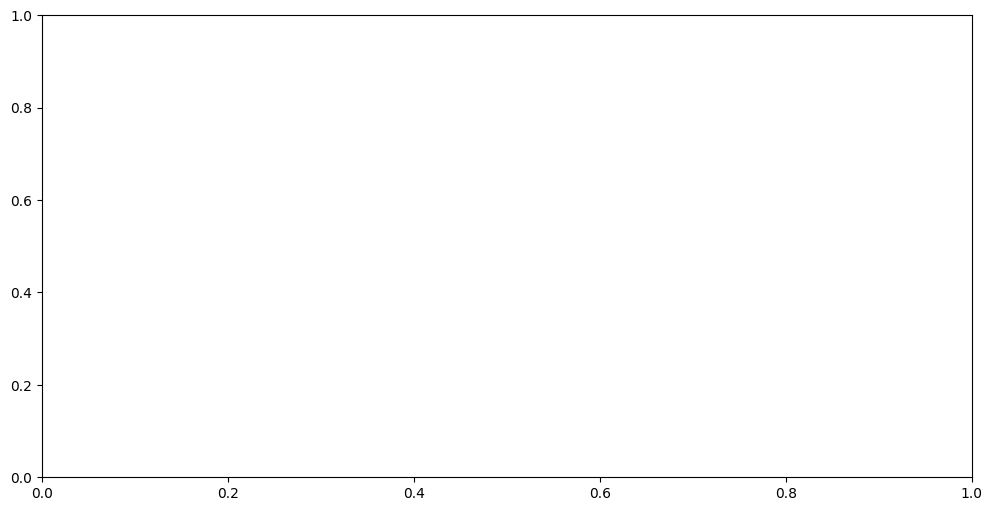

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(indexes, values, marker='o', linestyle='-')
plt.title("Average Sentiment Score by Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.show()